In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [2]:
device = torch.device('cuda:0')

In [3]:
from utils.data_utils import dataset_description, input_uniqueness, initial_dataloaders
from utils.data_utils import load_data_with_name

In [4]:
from utils import config

In [5]:
args_dic = {}
args_dic['epochs'] = 100
args_dic['batch_size']=64
args_dic['AL_iters'] = 10
args_dic['AL_batch']=32
args_dic['AL_select']='acc'
args_dic['init_num'] = 100
args_dic['val_ratio'] =0.2 
args_dic['problem_type'] = 'binary' 
args_dic['model_type'] ='NN'
args_dic['model_args'] ={'n_hidden':32, 'p_dropout':0.0}
args_dic['dataset'] = 'lsac'
args_dic['save_model']=True
args_dic['save_dir'] = None

In [6]:
args = config.Args(**args_dic)
# args = config.Args(epochs = 100, batch_size=64, 
#                    AL_iters = 10, AL_batch=32, AL_select='acc',
#                    init_num = 100, val_ratio =0.2, 
#                    problem_type = 'binary', 
#                    model_type='NN', model_args={'n_hidden':32, 'p_dropout':0.0},
#                    dataset = 'lsac', save_model=True, save_dir = None)

need to set selection params!
save directory:  ../results/lsac/220220_1806


In [7]:
Xtr, Xte, ytr, yte, Ztr, Zte = load_data_with_name(args.dataset, 
                                                   svm=False, random_state=42,intercept=False)

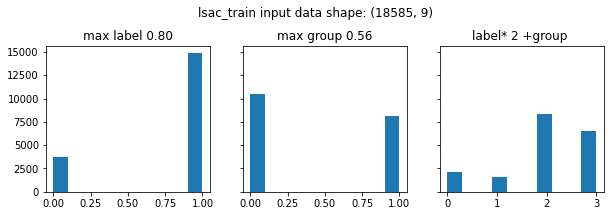

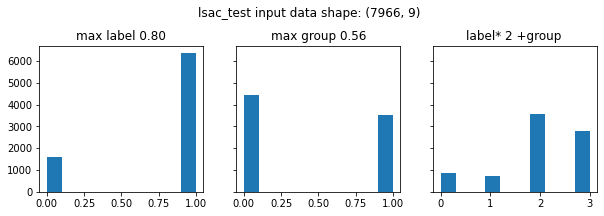

In [8]:
dataset_description(Xtr,ytr,Ztr, dataname=args.dataset+'_train')
dataset_description(Xte,yte,Zte, dataname=args.dataset+'_test')

In [9]:
input_uniqueness(Xtr,Xte)

26551 26480
redundant examples:  71


In [10]:
args.print_args()

train epochs/batch: 100/64
AL iters/batch: 10/32
AL selection is based on  acc
initial number and validation ratio are 100/0.2
problem and models are binary/NN


In [11]:
sel_args = {"param_names":None, "last_layer":True, "sel_idxs": None, "normalize":True}
sel_type = "binary_entropy" # identity, binary_entropy, entropy, random
args.set_selection_params(sel_type,sel_args)

In [12]:
N1 = args.init_num
train_loader, select_loader, test_loader = initial_dataloaders(Xtr,ytr,Ztr,Xte,yte,Zte,N1,args)

# Train model

In [13]:
from utils.train_utils import train_AL, train_AL_valid

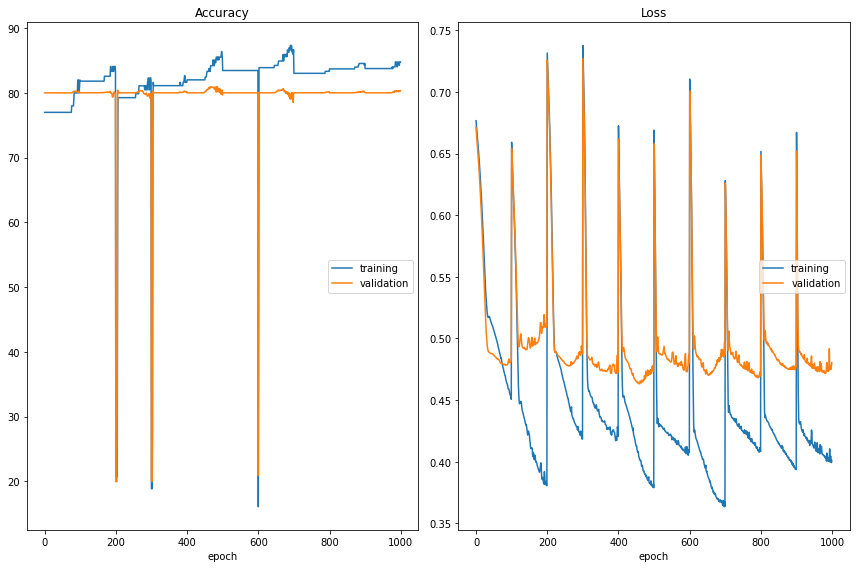

Accuracy
	training         	 (min:   16.096, max:   87.329, cur:   84.794)
	validation       	 (min:   19.985, max:   80.969, cur:   80.354)
Loss
	training         	 (min:    0.364, max:    0.738, cur:    0.401)
	validation       	 (min:    0.463, max:    0.727, cur:    0.480)
Finished Training
0.0 : loss 0.4191168248653412 / acc 83.74384307861328
1.0 : loss 0.382181316614151 / acc 85.9459457397461
final dataloader is saved in  ../results/lsac/220220_1806/final_dataloader.pkl


In [14]:
clf, train_loader_p, select_loader_p = train_AL(train_loader, select_loader, device, 
                                                      args, test_loader, True)

In [15]:
from utils.data_utils import save_dataloader

In [16]:
save_dataloader(args.save_dir,test_loader)

test_loader.pkl is stored in ../results/lsac/220220_1806/test_loader.pkl


In [18]:
import os

In [19]:
with open(os.path.join(args.save_dir,'train_AL.txt'),'w') as f:
    f.write(str(args_dic))
    f.write("\n")
    f.write(sel_type)
    f.write("\n")
    f.write(str(sel_args))    